# Variance
We seek to understand the variance of the averaged perceptron ensemble, compared to a regular perceptron and voting perceptron ensemble.

In [1]:
from tqdm.notebook import tqdm
import numpy as np
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from sklearn import svm, metrics, datasets
import warnings
from IPython.display import display, clear_output
import importlib
from addsgdclassifier import AddSGDClassifier
from perceptron import Perceptron as EnsembledPerceptron, Loader
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# def warn(*args, **kwargs):
#     pass


# warnings.warn = warn

In [2]:
def run_many(num_runs, epochs, title: str, train_path, test_path=None, test_size=None, dataset_name=None):
    # This should make splits in the same way as initializing an `EnsembledPerceptron`
    train_data, test_data = Loader.load(train_path, test_path, test_size)

    scores = []
    fig, ax = plt.subplots()
    display_id = display(fig, display_id=True)

    # outside the loop so it only loads the data once
    ensembled_perceptron = EnsembledPerceptron(trainpath=train_path, testpath=test_path, test_size=test_size, dataset_name=dataset_name)

    for seed in tqdm(range(num_runs)):
        normal_perceptron = Perceptron(max_iter=epochs, random_state=seed)
        normal_perceptron.fit(train_data[0], train_data[1])
        normal_score = normal_perceptron.score(test_data[0], test_data[1])
        # normal_score = metrics.accuracy_score(test_data[1], normal_perceptron.predict(test_data[0]))
        
        # Ensembles implemented with Scikit
        sk_perceptron = AddSGDClassifier(loss = 'perceptron', penalty = None, eta0 = 1, max_iter=epochs, random_state = seed, epoch_size = 1.0)
        sk_perceptron.fit(train_data[0], train_data[1])
        sk_perceptron_score = sk_perceptron.score(test_data[0], test_data[1])

        sk_svm = AddSGDClassifier(loss = 'hinge', penalty = None, max_iter=epochs, random_state = seed, epoch_size = 1.0)
        sk_svm.fit(train_data[0], train_data[1])
        sk_svm_score = sk_svm.score(test_data[0], test_data[1])

        sk_lr = AddSGDClassifier(loss = 'log_loss', penalty = None, max_iter=epochs, random_state = seed, epoch_size = 1.0)
        sk_lr.fit(train_data[0], train_data[1])
        sk_lr_score = sk_lr.score(test_data[0], test_data[1])

        ensembled_perceptron.train(ensemble_size=epochs, data_opts="window", epoch_size=0.5, log="none")
        ensembled_score = ensembled_perceptron.accuracy

        scores.append([normal_score, sk_perceptron_score, sk_svm_score, sk_lr_score])

        # Update plot live
        ax.clear()
        scores_array = np.array(scores)
        ax.violinplot(scores_array, showmeans=True)
        ax.set_xticks([1, 2, 3, 4])
        ax.set_xticklabels(["Perceptron", "E-Perceptron", "E-SVM", "E-LR"])
        ax.set_title(title)
        display_id.update(fig)
        # plt.pause(0.02)
    
    svm_clf = svm.LinearSVC()
    svm_clf.fit(train_data[0], train_data[1])
    svm_score = svm_clf.score(test_data[0], test_data[1])

    scores = np.array(scores)
    print(f"Perceptron: {scores[:, 0].mean()} ± {scores[:, 0].std()}")
    print(f"E-Perceptron: {scores[:, 1].mean()} ± {scores[:, 1].std()}")
    print(f"E-SVM(sk): {scores[:, 2].mean()} ± {scores[:, 2].std()}")
    print(f"E-LR(sk): {scores[:, 3].mean()} ± {scores[:, 3].std()}")
    print(f"SVM: {svm_score}")
    # plt.ioff()
    # plt.show()

    return scores

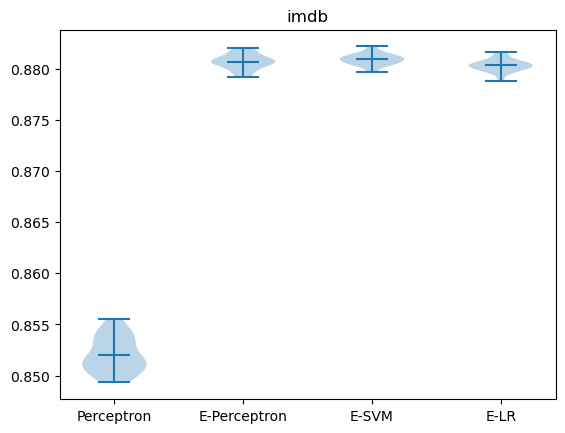

  0%|          | 0/20 [00:00<?, ?it/s]

Perceptron: 0.8520119999999999 ± 0.0017006398795747254
E-Perceptron: 0.8806820000000002 ± 0.0007163769957222178
E-SVM(sk): 0.880898 ± 0.000543540246899896
E-LR(sk): 0.8803179999999999 ± 0.0006159837660198544
SVM: 0.85264


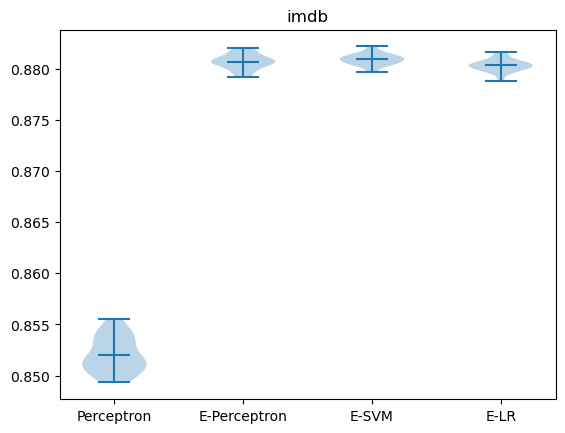

In [3]:
_ = run_many(num_runs=20, epochs=30, title="imdb", train_path="../data/imdb/train_labeledBow.feat", test_path="../data/imdb/test_labeledBow.feat", dataset_name="imdb")

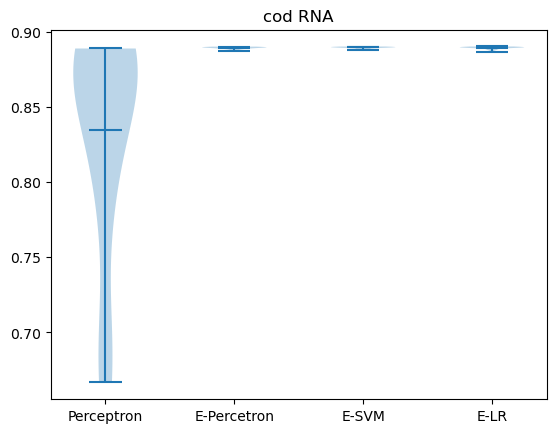

  0%|          | 0/20 [00:00<?, ?it/s]

Perceptron: 0.8346071858536102 ± 0.07118719247422306
Ensembled: 0.8894034614917328 ± 0.0007050487913884054
Ensembled(sk): 0.8896241766899715 ± 0.0005685748900166621
SVM: 0.951192303869051
MLP: 0.8717679673952661


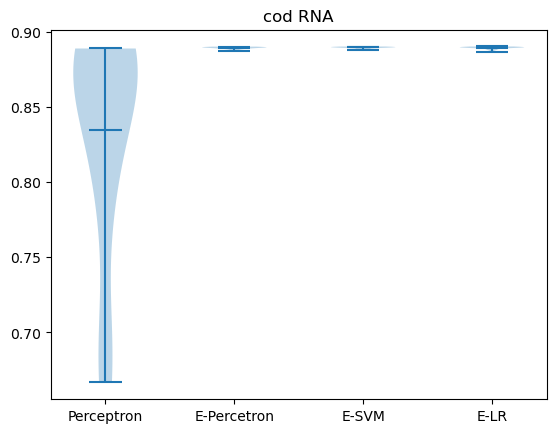

In [4]:
_ = run_many(num_runs=20, epochs=100, title="cod RNA", train_path="../data/cod-rna/train.txt", test_path="../data/cod-rna/test.txt")

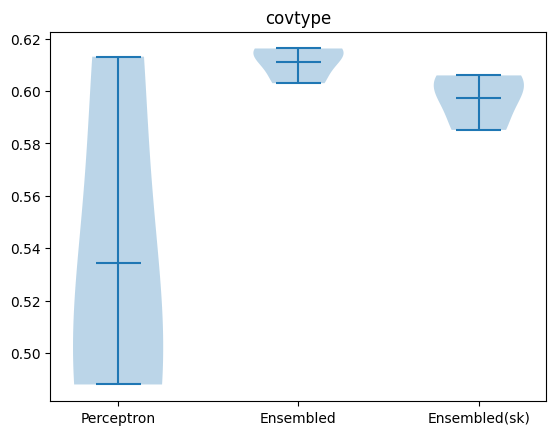

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

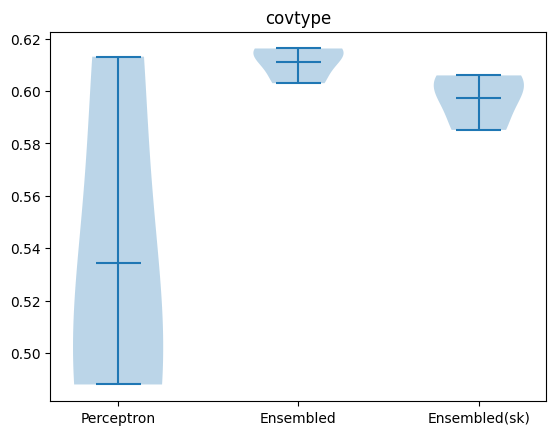

In [4]:
_ = run_many(num_runs=20, epochs=100, title="covtype", train_path="../data/cov/covtype.libsvm.binary")

In [ ]:
_ = run_many(num_runs=20, epochs=100, title="unigram", train_path="../data/webspam/unigram.svm")

In [ ]:
_ = run_many(num_runs=20, epochs=200, title="poker", train_path="../data/poker/poker", test_path="../data/poker/poker.t")